# We want to create a customer segmentation based on age and income

# Imports

In [1]:
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Read dataset

In [2]:
df = pd.read_csv('./data/segmentation data.csv')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
cluster_df = df[['Age', 'Income']]

In [5]:
cluster_df.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


# Data analysis

## Distributions

<Axes: >

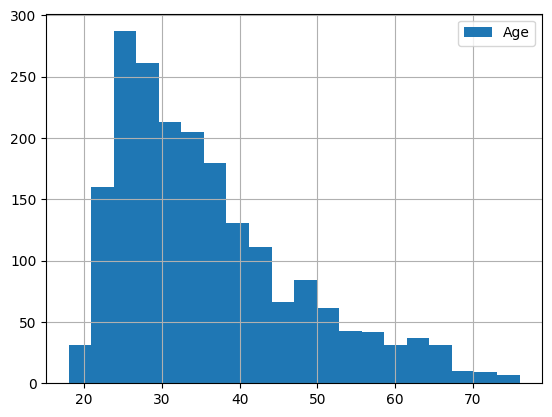

In [48]:
cluster_df['Age'].hist(bins=20, legend=True)

<Axes: >

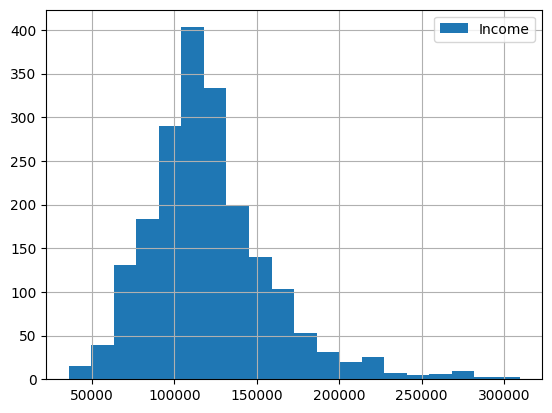

In [11]:
cluster_df['Income'].hist(bins=20, legend=True)

## Age VS Income

Text(0, 0.5, 'Income')

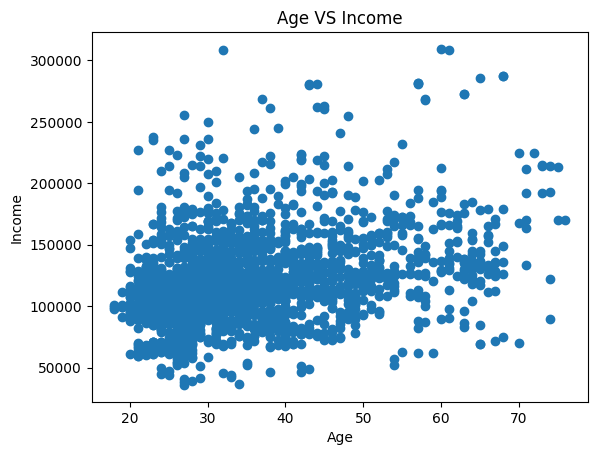

In [12]:
plt.scatter(cluster_df['Age'], cluster_df['Income'])
plt.title("Age VS Income")
plt.xlabel("Age")
plt.ylabel("Income")

# Train KMeans with 3 cluster algorithm

In [13]:
kmeans = KMeans(n_clusters=3, max_iter=100)

In [14]:
kmeans.fit(cluster_df)

KMeans(max_iter=100, n_clusters=3)

In [15]:
kmeans.cluster_centers_

array([[3.19616685e+01, 9.07901838e+04],
       [3.79000000e+01, 1.32116442e+05],
       [4.39342723e+01, 1.99404446e+05]])

In [17]:
cluster_df.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


In [16]:
kmeans.predict(cluster_df)

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
cluster_df['customer_cluster'] = kmeans.predict(cluster_df)

/tmp/ipykernel_127355/650102737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['customer_cluster'] = kmeans.predict(cluster_df)


In [19]:
cluster_df.head()

,Age,Income,customer_cluster
0,67,124670,1
1,22,150773,1
2,49,89210,0
3,45,171565,2
4,53,149031,1


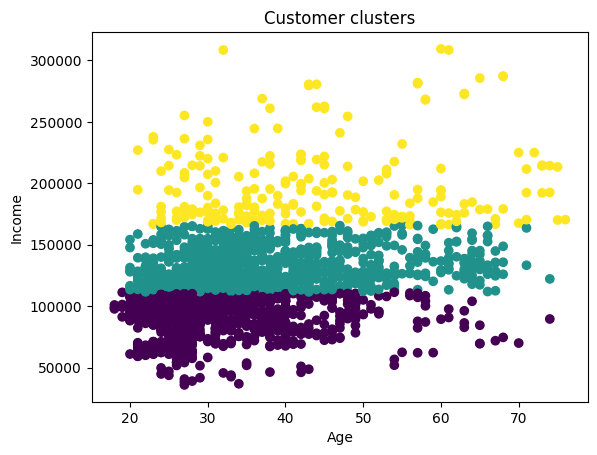

In [20]:
plt.scatter(cluster_df['Age'], cluster_df['Income'], c=cluster_df['customer_cluster'])
plt.title("Customer clusters")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

# Scale income
Since income is much highr than age, it will affect the distance calculation much more than age.

This can be seen in the image above, where the clusters seem to only devide customers by income.

In [21]:
max_income = cluster_df['Income'].max()

In [22]:
max_income

309364

In [23]:
cluster_df['normalized_income'] = cluster_df['Income']*100 / max_income

/tmp/ipykernel_127355/917944940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['normalized_income'] = cluster_df['Income']*100 / max_income


In [24]:
cluster_df.head()

,Age,Income,customer_cluster,normalized_income
0,67,124670,1,40.298807
1,22,150773,1,48.736440
2,49,89210,0,28.836581
3,45,171565,2,55.457325
4,53,149031,1,48.173349


Text(0, 0.5, 'Normlized income')

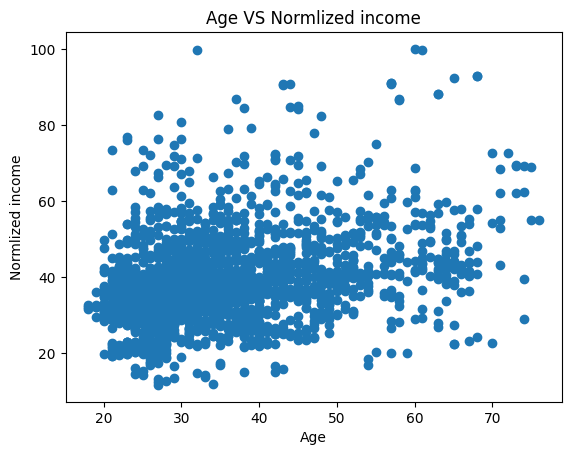

In [25]:
plt.scatter(cluster_df['Age'], cluster_df['normalized_income'])
plt.title("Age VS Normlized income")
plt.xlabel("Age")
plt.ylabel("Normlized income")

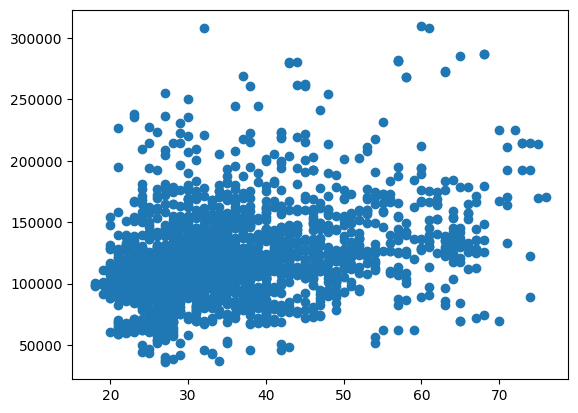

In [26]:
plt.scatter(cluster_df['Age'], cluster_df['Income'])

In [27]:
kmeans = KMeans(n_clusters=3, max_iter=100)

In [28]:
cluster_df.head()

,Age,Income,customer_cluster,normalized_income
0,67,124670,1,40.298807
1,22,150773,1,48.736440
2,49,89210,0,28.836581
3,45,171565,2,55.457325
4,53,149031,1,48.173349


In [29]:
kmeans.fit(cluster_df[['Age', 'normalized_income']])

KMeans(max_iter=100, n_clusters=3)

In [30]:
cluster_df['customer_cluster'] = kmeans.predict(cluster_df[['Age', 'normalized_income']])

/tmp/ipykernel_127355/2443315480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['customer_cluster'] = kmeans.predict(cluster_df[['Age', 'normalized_income']])


In [31]:
cluster_df.head()

,Age,Income,customer_cluster,normalized_income
0,67,124670,2,40.298807
1,22,150773,1,48.736440
2,49,89210,2,28.836581
3,45,171565,1,55.457325
4,53,149031,2,48.173349


In [33]:
kmeans.cluster_centers_

array([[29.80598222, 33.01199048],
       [35.95031056, 57.78231673],
       [52.99773243, 42.52561858]])

In [35]:
kmeans.cluster_centers_[:,1]

array([33.01199048, 57.78231673, 42.52561858])

Text(0, 0.5, 'Normalized income')

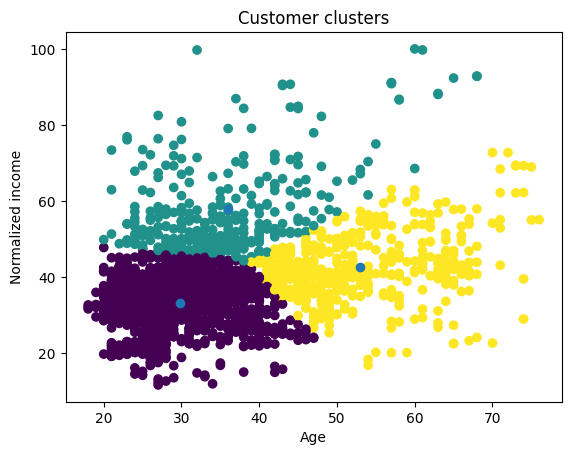

In [32]:
plt.scatter(cluster_df['Age'], cluster_df['normalized_income'], c=cluster_df['customer_cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
plt.title("Customer clusters")
plt.xlabel("Age")
plt.ylabel("Normalized income")

# Train KMeans with 2 clusters

In [36]:
kmeans = KMeans(n_clusters=2, max_iter=100)

In [37]:
kmeans.fit(cluster_df[['Age', 'normalized_income']])

KMeans(max_iter=100, n_clusters=2)

In [38]:
cluster_df['customer_cluster'] = kmeans.predict(cluster_df[['Age', 'normalized_income']])

/tmp/ipykernel_127355/2443315480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['customer_cluster'] = kmeans.predict(cluster_df[['Age', 'normalized_income']])


Text(0, 0.5, 'Normalized income')

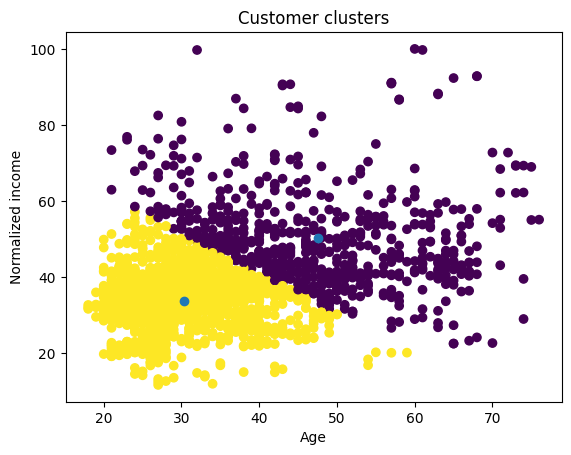

In [39]:
plt.scatter(cluster_df['Age'], cluster_df['normalized_income'], c=cluster_df['customer_cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
plt.title("Customer clusters")
plt.xlabel("Age")
plt.ylabel("Normalized income")

# Elbow method

In [40]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=100)
    kmeanModel.fit(cluster_df[['Age', 'normalized_income']])
    distortions.append(kmeanModel.inertia_)

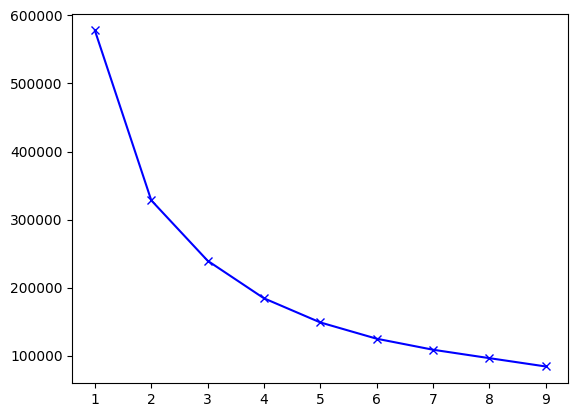

In [42]:
plt.plot(K, distortions, 'bx-')